In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.7 MB/s eta 0:00:00


In [ ]:
import os
import pydicom
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
capstone_datasets_path = "/content/drive/MyDrive/Dataset_batch2"

In [ ]:
dicom_count = sum(1 for file in os.listdir(capstone_datasets_path) if file.endswith(".dcm"))
print(dicom_count)

73


In [ ]:
hn_dict = defaultdict(lambda: 0)
for file in os.listdir(capstone_datasets_path):
    file_name = file[:-4]
    splited = file_name.split("_")
    if(len(splited) == 3):
      hn = splited[0]
      date = splited[1]
      no = splited[2]

      hn_dict[hn] += 1

In [ ]:
df = pd.DataFrame(hn_dict.items(), columns=["HN", "Number of Images"])
df = df.sort_values(by="Number of Images", ascending=False)

In [ ]:
df.reset_index()

,index,HN,Number of Images
0,3,4511244,4
1,4,424357,4
2,29,4113618,4
3,23,4316515,4
4,34,5218309,4
5,25,543603,3
6,38,5110313,3
7,20,536853,2
8,9,5211071,2
9,14,462431,2


In [ ]:
len(df.index)

44

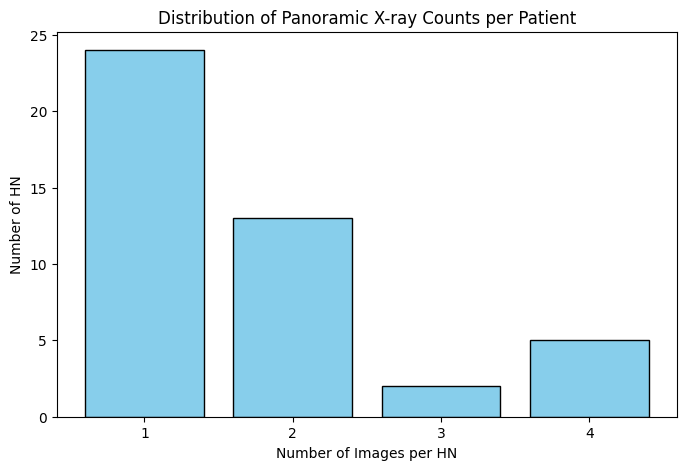

In [ ]:
# Count occurrences of each "Number of Images"
count_distribution = df["Number of Images"].value_counts().sort_index().reset_index()
count_distribution.columns = ["Number of Images", "Count"]  # Rename columns

# Add a column for 20% of count
count_distribution["20% of images"] = (count_distribution["Number of Images"] * count_distribution["Count"] * 0.2).round().astype(int)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(count_distribution["Number of Images"], count_distribution["Count"], color='skyblue', edgecolor='black')

# Labels
plt.xlabel("Number of Images per HN")
plt.ylabel("Number of HN")
plt.title("Distribution of Panoramic X-ray Counts per Patient")
plt.xticks(count_distribution["Number of Images"])

# Show plot
plt.show()

In [ ]:
display(count_distribution)

,Number of Images,Count,20% of images
0,1,24,5
1,2,13,5
2,3,2,1
3,4,5,4


Batch1:
divide files based on 20% of images but concern about patient id and the test datasets must have 23 file

number of test images 4, 4, 6, 4, 5


number of test patient = 4, 2, 2, 1, 1


Batch2:
divide files based on 20% of images but concern about patient id and the test datasets must have 14 file

number of test images 5, 2, 3, 4


number of test patient = 5, 1, 1, 1

In [ ]:
no_test_images = [5, 2, 3, 4]
count_distribution['number of test images'] = no_test_images
count_distribution['number of test patient'] = (count_distribution['number of test images'] / count_distribution['Number of Images']).astype(int)

In [ ]:
display(count_distribution)

,Number of Images,Count,20% of images,number of test images,number of test patient
0,1,24,5,5,5
1,2,13,5,2,1
2,3,2,1,3,1
3,4,5,4,4,1


In [ ]:
# Initialize lists to store test and train HNs
test_hn_list = []
train_hn_list = []

# Randomly select test HNs
for _, row in count_distribution.iterrows():
    num_images = row["Number of Images"]
    num_test = row["number of test patient"]

    # Get all HNs with this number of images
    hn_subset = df[df["Number of Images"] == num_images]["HN"].tolist()

    # Randomly select test patients
    test_hn = np.random.choice(hn_subset, size=min(num_test, len(hn_subset)), replace=False).tolist()
    train_hn = list(set(hn_subset) - set(test_hn))  # Remaining HNs for training

    # Store results
    test_hn_list.extend(test_hn)
    train_hn_list.extend(train_hn)

In [ ]:
print(len(train_hn_list))
print(len(test_hn_list))

36
8


In [ ]:
with open("test_file_names.txt", "w") as test_file:
    test_file.write("\n".join(map(str, test_hn_list)))

# Save train HNs to a text file
with open("train_file_names.txt", "w") as train_file:
    train_file.write("\n".join(map(str, train_hn_list)))

# Print results
print(f"Saved {len(test_hn_list)} test HNs to test_file_names.txt")
print(f"Saved {len(train_hn_list)} train HNs to train_file_names.txt")

Saved 8 test HNs to test_file_names.txt
Saved 36 train HNs to train_file_names.txt


In [ ]:
# Initialize lists to store train and test data
test_data = []
train_data = []

# Randomly select test HNs
for _, row in count_distribution.iterrows():
    num_images = row["Number of Images"]
    num_test = row["number of test patient"]

    # Get all HNs with this number of images
    hn_subset = df[df["Number of Images"] == num_images]

    # Randomly select test patients
    test_hn_subset = hn_subset.sample(n=min(num_test, len(hn_subset)), random_state=42)
    train_hn_subset = hn_subset.drop(test_hn_subset.index)  # Remaining HNs for training

    # Store results
    test_data.extend(test_hn_subset.to_dict(orient="records"))
    train_data.extend(train_hn_subset.to_dict(orient="records"))

# Convert lists to DataFrames
test_df = pd.DataFrame(test_data)
train_df = pd.DataFrame(train_data)

# Save to CSV files
test_df.to_csv("test_HN.csv", index=False)
train_df.to_csv("train_HN.csv", index=False)

# Print confirmation
print(f"Saved {len(test_df)} test records to test_data.csv")
print(f"Saved {len(train_df)} train records to train_data.csv")

Saved 8 test records to test_data.csv
Saved 36 train records to train_data.csv
